In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime 
from pandas_datareader import data as pdr
import time
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
import requests
from bcb import currency
from bcb import sgs
from fpdf import FPDF
from matplotlib.dates import date2num
import warnings

In [15]:
sns.set_style('whitegrid')

indice = ['^BVSP']
hoje = datetime.now()
ultimo_dia = hoje - timedelta(days=366)

dados_mercado_bolsa = pdr.get_data_yahoo(indice, start=ultimo_dia, end=hoje)
dados_mercado_bolsa = dados_mercado_bolsa[['Adj Close','High']]
dados_mercado_bolsa = dados_mercado_bolsa.dropna()
dados_mercado_bolsa = dados_mercado_bolsa.resample('M').last()
dados_mercado_bolsa = dados_mercado_bolsa.pct_change().dropna()
dados_mercado_bolsa

Attributes,Adj Close,High
Symbols,^BVSP,^BVSP
Date,,
2021-11-30,-0.015324,-0.027257
2021-12-31,0.028524,0.021375
2022-01-31,0.072180,0.068643
2022-02-28,0.006709,0.005751
2022-03-31,0.060605,0.068392
2022-04-30,-0.101026,-0.074959
2022-05-31,0.032213,0.000751
2022-06-30,-0.115033,-0.109774


In [18]:
indice = ['BTC-USD']

bitcoin = pdr.get_data_yahoo(indice,
                             start=datetime.datetime(2018,1,1),
                             end=datetime.datetime(2022, 4, 1))

In [19]:
bitcoin

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2018-01-01,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072
...,...,...,...,...,...,...
2022-03-29,47465.730469,47465.730469,48022.289062,47100.437500,47100.437500,31397059069
2022-03-30,47062.664062,47062.664062,47655.148438,46746.210938,47456.898438,29333883962


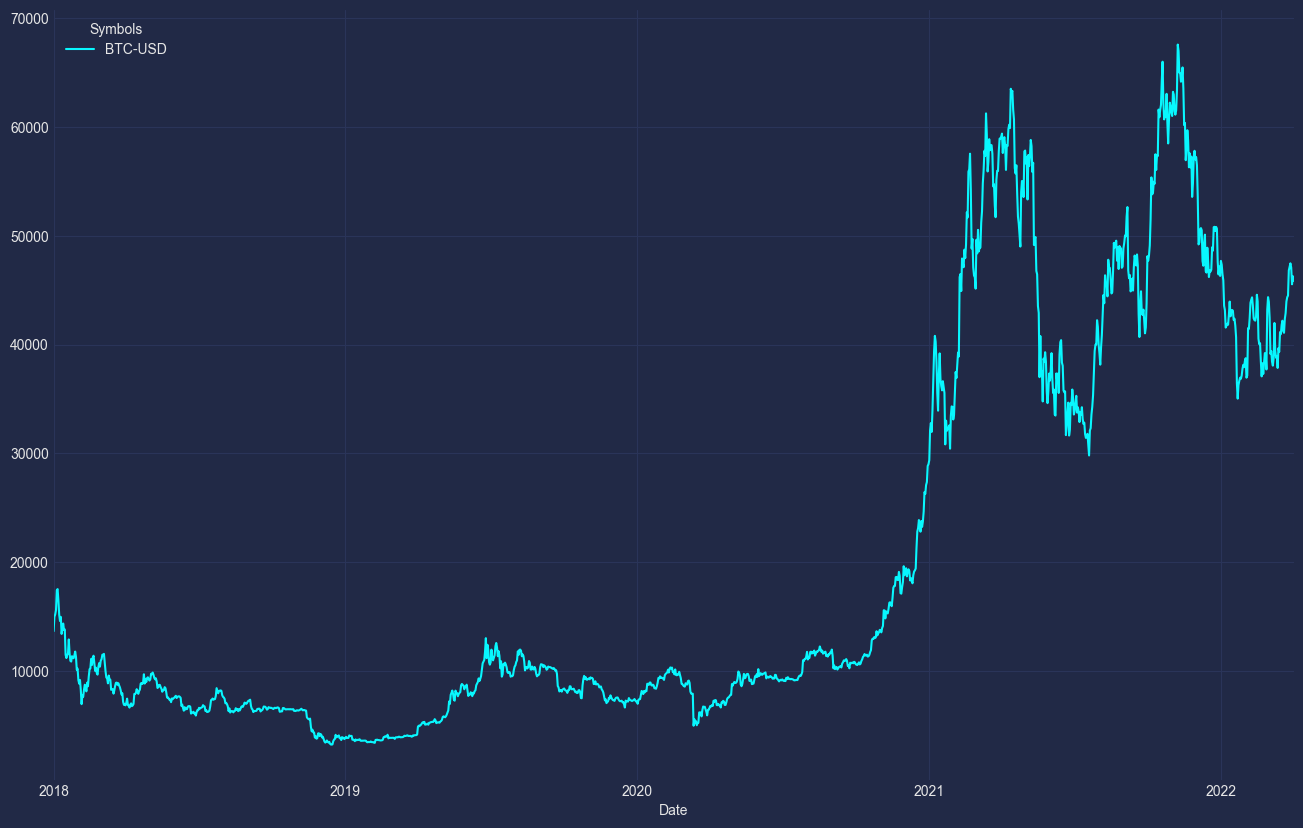

In [30]:
plt.style.use('cyberpunk')

bitcoin['Close'].plot( figsize=(16, 10) )

plt.show()

In [33]:
btc = bitcoin.loc['2021-01':'2022-04'].copy()
btc

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2021-01-01,29374.152344,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...,...
2022-03-29,47465.730469,47465.730469,48022.289062,47100.437500,47100.437500,31397059069
2022-03-30,47062.664062,47062.664062,47655.148438,46746.210938,47456.898438,29333883962


In [34]:
btc['med_mov_sim_30d'] = btc['Close'].rolling( window=30 ).mean()
btc

In [3]:
ping = sns.load_dataset('penguins')
ping.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
ping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
ping.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [6]:
ping.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
ping.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
ping.columns = ['especies', 'ilha', 'comprimento_bico', 'largura_bico', 'comprimento_asa', 'massa_corporal_g', 'sexo']

In [9]:
ping

,especies,ilha,comprimento_bico,largura_bico,comprimento_asa,massa_corporal_g,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


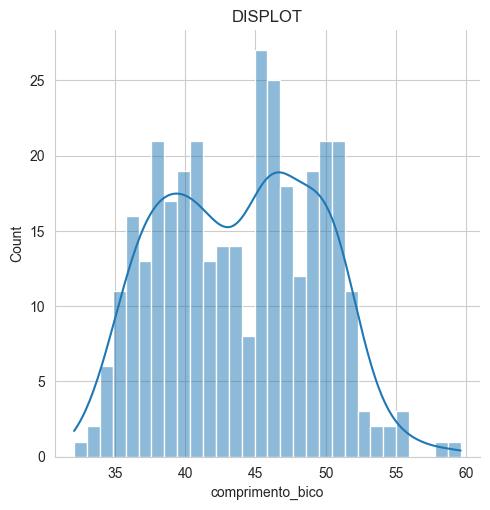

In [10]:
sns.displot(ping['comprimento_bico'], bins=30, kde=True).set(title='DISPLOT')

[Text(0.5, 1.0, 'HISTPLOT')]

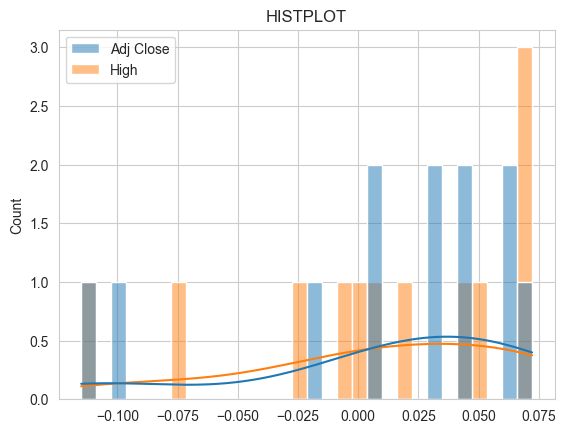

In [11]:
sns.histplot(dados_mercado_bolsa[['Adj Close','High']], bins=30, kde=True).set(title='HISTPLOT')

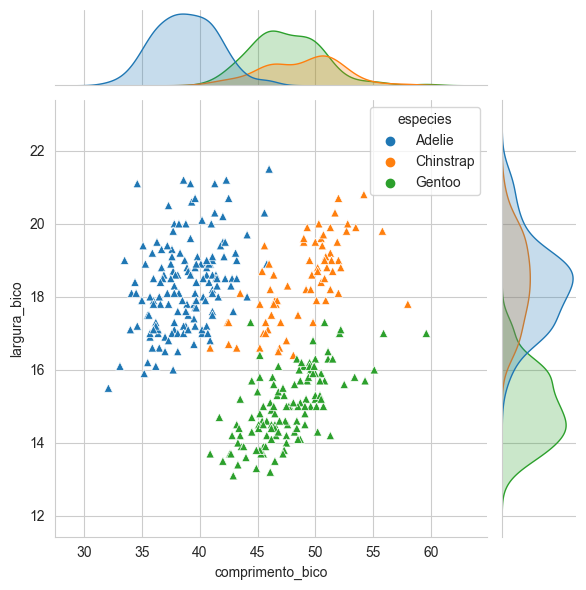

In [12]:
sns.jointplot(data=ping, x='comprimento_bico', y='largura_bico', hue='especies', marker='^')